# Cancer Data Logistic Regression (Key)

In [1]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency


Uncomment if you need the data files

In [3]:
!wget https://aet-cs.github.io/white/ML/data/Cancer_Data.csv
!wget https://aet-cs.github.io/white/ML/data/Cancer_Data_Cleaned.csv

--2025-11-11 14:02:44--  https://aet-cs.github.io/white/ML/data/Cancer_Data.csv
Resolving aet-cs.github.io (aet-cs.github.io)... 185.199.108.153, 185.199.111.153, 185.199.110.153, ...
Connecting to aet-cs.github.io (aet-cs.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125773 (123K) [text/csv]
Saving to: ‘Cancer_Data.csv.4’

Cancer_Data.csv.4   100%[===================>] 122.83K  --.-KB/s    in 0.01s   

2025-11-11 14:02:44 (8.48 MB/s) - ‘Cancer_Data.csv.4’ saved [125773/125773]

--2025-11-11 14:02:44--  https://aet-cs.github.io/white/ML/data/Cancer_Data_Cleaned.csv
Resolving aet-cs.github.io (aet-cs.github.io)... 185.199.108.153, 185.199.111.153, 185.199.110.153, ...
Connecting to aet-cs.github.io (aet-cs.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125575 (123K) [text/csv]
Saving to: ‘Cancer_Data_Cleaned.csv.4’

Cancer_Data_Cleaned 100%[===================>] 122.63K  --.-KB/s

In [4]:
data_root = "../data" ## change this line if needed
filename = "Cancer_Data.csv"
filepath = os.path.join(data_root, filename)
df = pd.read_csv(filepath)

In [5]:
def get_data(filename):
    df = pd.read_csv(filename)
    df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1, inplace=True)
    return df

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1, inplace=True)

In [8]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,NaN


In [9]:
def pre_process_data(df, one_hot_encode = False):
    # Use sklearn Imputers to fill in the categorical and numerical columns
    simple_median = SimpleImputer(strategy='median')
    simple_most_freq = SimpleImputer(strategy='most_frequent')

    num_cols = df.select_dtypes(include=np.number).columns # numerical data
    cat_cols = df.select_dtypes(include=object).columns # categorical data

    # Handle missing values
    df[num_cols] = simple_median.fit_transform(df[num_cols])
    df[cat_cols] = simple_most_freq.fit_transform(df[cat_cols])

    # Replace infinite values with NaN and then impute
    df = df.replace([np.inf, -np.inf], np.nan)
    df[num_cols] = simple_median.fit_transform(df[num_cols])

    if one_hot_encode:
        O_encoder = OrdinalEncoder()
        df[cat_cols]= O_encoder.fit_transform(df[cat_cols])

    return df

In [10]:
def get_test_train(df, test_size = 0.2, random_state = True):
    target = "diagnosis"
    X = df.drop(target, axis=1)

    # Robust scaling to handle outliers, based on median and inter-quartile range
    scaler = preprocessing.RobustScaler().fit(X)
    X = scaler.transform(X)

    # Additional check for any remaining infinite values
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

    y = df[target]
    if random_state is True:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

## Start Work Here

In [11]:
# These lines would load the data locally
data_root = "../data"
filename = "cancer_data_cleaned.csv"
filepath = os.path.join(data_root, filename)

# Perform a logistic regression
df = get_data(filepath)
df = pre_process_data(df, one_hot_encode = True)
X_train, X_test, y_train, y_test = get_test_train(df, random_state = False)

# Create logistic regression with liblinear solver
lreg = LogisticRegression(
    C=1.0,
    solver='liblinear',  # Different solver that might be more stable
    max_iter=10000,  # increased from default because of squirrely data
    tol=1e-4, # tolerance set to 0.0001
)
model = lreg.fit(X_train, y_train)

In [12]:
X_test

array([[-1.02983782e-01, -2.20588235e-01, -4.26287744e-02, ...,
         8.77258335e-02,  3.93491124e-01,  2.60095012e-01],
       [-5.84711989e-03,  1.36519608e+00,  4.38721137e-01, ...,
         8.56956603e-01, -6.21301775e-01, -8.23040380e-01],
       [-1.12961235e-01,  5.12254902e-01,  1.13676732e-01, ...,
         8.82287204e-01,  4.11242604e-01, -4.25178147e-01],
       ...,
       [-2.68570481e-03, -4.53431373e-01, -6.94493783e-01, ...,
        -7.84131123e-02,  2.69230769e-01,  1.66270784e-02],
       [-2.86433219e-03,  2.08333333e-01,  1.60035524e+00, ...,
         1.97057180e-01, -1.33136095e+00, -2.96912114e-02],
       [ 1.10888677e+01,  1.80392157e+00,  2.18117229e+00, ...,
         9.86403427e-01, -6.80473373e-02, -5.70071259e-01]],
      shape=(114, 11))

Get the model score

In [13]:
pred = lreg.predict(X_test[0:1])
print("Prediction for first sample:", pred[0])
print(f"Train accuracy  = {model.score(X_train, y_train):.3}")
print(f"Test  accuracy  = {model.score(X_test, y_test):.3}")

Prediction for first sample: 0.0
Train accuracy  = 0.938
Test  accuracy  = 0.939


In [14]:
# Get feature names from the original dataframe (excluding the target column)
feature_names = df.drop('diagnosis', axis=1).columns

# Create a DataFrame with feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lreg.coef_[0],
    'Abs_Coefficient': abs(lreg.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Model Coefficients (sorted by absolute value):")
print(coef_df)

print("\nIntercept:", lreg.intercept_[0])

Model Coefficients (sorted by absolute value):
                   Feature  Coefficient  Abs_Coefficient
8      concave points_mean     1.704627         1.704627
2             texture_mean     1.625313         1.625313
5          smoothness_mean     1.337127         1.337127
4                area_mean     1.295670         1.295670
7           concavity_mean     1.172355         1.172355
1              radius_mean     1.018659         1.018659
3           perimeter_mean     0.908843         0.908843
9            symmetry_mean     0.600482         0.600482
6         compactness_mean    -0.436810         0.436810
10  fractal_dimension_mean    -0.420065         0.420065
0                       id    -0.020458         0.020458

Intercept: -2.0366140303179745


Quick snapshot of the confusion matrix (rows are truth  0/1 and cols are predictions 0/1). You can shift-tab on the parens the see the method signature)

In [15]:
confusion_matrix(y_pred = model.predict(X_test), y_true = y_test)

array([[68,  3],
       [ 4, 39]])

We want to get the probabilites from X-test, NOT the classifications. So we want real values in (0,1).

In [16]:
# Get predicted probabilities for the test data
y_prob = model.predict_proba(X_test)[:,1]

If we sort y_prob and y_test in the same order, then we can make a reasonable plot

In [17]:
# Sort the data for plotting
y_pred = model.predict(X_test)
sorted_indices = np.argsort(y_prob)  ## argsort returns the indices ordered by the key values, so we can copy the sort order around
sorted_y_prob = y_prob[sorted_indices]
sorted_y_test = np.array(y_test)[sorted_indices]
sorted_y_pred = np.array(y_pred)[np.argsort(y_pred)]

Print the vector of sorted_y_prob and of sorted_y_test to verify the are generally increasing from 0 to 1. We create a dataframe also just because.

In [18]:
pd.set_option('display.max_rows', None)

results_df = pd.DataFrame({"Probs": sorted_y_prob, 
                           "True y": sorted_y_test,
                           "Pred y":  sorted_y_pred})
results_df


,Probs,True y,Pred y
0,0.000160,0.0,0.0
1,0.000259,0.0,0.0
2,0.000411,0.0,0.0
3,0.000880,0.0,0.0
4,0.000893,0.0,0.0
5,0.001355,0.0,0.0
6,0.001566,0.0,0.0
7,0.002306,0.0,0.0
8,0.002804,0.0,0.0
9,0.002921,0.0,0.0


Now we can plot the logistic model, along with the true and predicted values. We set the split point at 0.5, but it can be changed

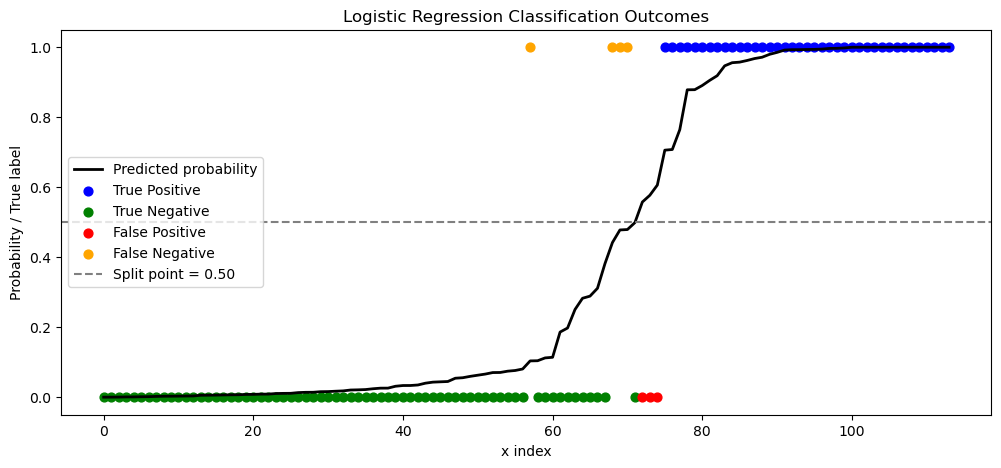

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# find the index of the first value in y_prob that is greater than split_point
split_point = 0.5
index = np.searchsorted(sorted_y_prob, split_point)
new_y_pred = np.where(sorted_y_prob > split_point, 1, 0)

x_test = np.array(range(len(y_test))) ## just a counter 
# For demonstration if needed:
# x_test = np.linspace(-3, 3, len(y_test))

# Compute confusion categories
# these numpy calculation return a LIST of INDICES, which is very powerful!
# see how they're used below
tp = (sorted_y_test == 1) & (new_y_pred == 1)
tn = (sorted_y_test == 0) & (new_y_pred == 0)
fp = (sorted_y_test == 0) & (new_y_pred == 1)
fn = (sorted_y_test == 1) & (new_y_pred == 0)

# --- Plot setup ---
plt.figure(figsize=(12 ,5))

# Logistic curve (predicted probabilities)
plt.plot(x_test, sorted_y_prob, color='black', linewidth=2, label='Predicted probability')

# Scatter for each category
plt.scatter(x_test[tp], sorted_y_test[tp], color='blue', s=40, label='True Positive')
plt.scatter(x_test[tn], sorted_y_test[tn], color='green', s=40, label='True Negative')
plt.scatter(x_test[fp], sorted_y_test[fp], color='red', s=40, label='False Positive')
plt.scatter(x_test[fn], sorted_y_test[fn], color='orange', s=40, label='False Negative')

# Optional: plot your custom split point threshold line
plt.axhline(split_point, color='gray', linestyle='--', label=f'Split point = {split_point:.2f}')

# Labels and legend
plt.xlabel('x index')
plt.ylabel('Probability / True label')
plt.title('Logistic Regression Classification Outcomes')
plt.legend(loc='center left', frameon=True)

plt.show()


# Binary Classification Helper Functions

Binary classification for logistic regression relies on knowing where the **split point** (threshold) is.
By default, this split point is `alpha = 0.5`, meaning that predicted probabilities greater than 0.5
are classified as `1` (positive), and those less than or equal to 0.5 are classified as `0` (negative).

However, `alpha = 0.5` is not always optimal — depending on the dataset and the cost of errors, 
a different threshold may produce better results.

In this exercise, you will define a set of helper functions to analyze binary classification results 
and help determine the optimal value of `alpha`.  

Each function will help you compute parts of the **confusion matrix** and related performance metrics.

---

## ✏️ Your tasks

1. **binary_classify(y_prob, alpha)**  
   - Given a vector of predicted probabilities (`y_prob`), return a vector of 0s and 1s  
     depending on whether each probability exceeds `alpha`.

2. **tp(true, observed)**  
   - Return the number of *true positives*: cases where both the true label and the prediction are 1.

3. **tn(true, observed)**  
   - Return the number of *true negatives*: cases where both are 0.

4. **fp(true, observed)**  
   - Return the number of *false positives*: predicted 1 but actually 0.

5. **fn(true, observed)**  
   - Return the number of *false negatives*: predicted 0 but actually 1.

6. **precision(true, observed)**  
   - Compute precision = TP / (TP + FP).  
     (Handle divide-by-zero cases gracefully.)

7. **recall(true, observed)**  
   - Compute recall = TP / (TP + FN).  
     (Handle divide-by-zero cases gracefully.)

8. **score(true, observed, weights)**  
   - Return a *weighted score* using a custom set of weights for (TP, FP, TN, FN).  
     For example, you might choose to penalize false negatives more heavily than false positives.

---

Once you’ve implemented these, you’ll be able to:
- Explore how changing `alpha` affects precision, recall, and F1 score,  
- Visualize the trade-off between sensitivity and specificity, and  
- Find the threshold that maximizes your chosen performance metric.


In [24]:
import numpy as np

def binary_classify(y_prob, alpha):
    """Return 1 if probability > alpha, else 0."""
    return (y_prob > alpha).astype(int)


def tp(true, observed):
    """True positives: predicted 1, actually 1."""
    return np.sum((true == 1) & (observed == 1))


def tn(true, observed):
    """True negatives: predicted 0, actually 0."""
    return np.sum((true == 0) & (observed == 0))


def fp(true, observed):
    """False positives: predicted 1, actually 0."""
    return np.sum((true == 0) & (observed == 1))


def fn(true, observed):
    """False negatives: predicted 0, actually 1."""
    return np.sum((true == 1) & (observed == 0))


def precision(true, observed):
    """Precision = TP / (TP + FP)"""
    TP = tp(true, observed)
    FP = fp(true, observed)
    return TP / (TP + FP) if (TP + FP) > 0 else 0.0


def recall(true, observed):
    """Recall = TP / (TP + FN)"""
    TP = tp(true, observed)
    FN = fn(true, observed)
    return TP / (TP + FN) if (TP + FN) > 0 else 0.0


def score(true, observed, weights):
    """
    Weighted score of TP, FP, TN, FN.
    weights = (w_tp, w_fp, w_tn, w_fn)
    """
    w_tp, w_fp, w_tn, w_fn = weights
    return (tp(true, observed) * w_tp +
            fp(true, observed) * w_fp +
            tn(true, observed) * w_tn +
            fn(true, observed) * w_fn)


def f1(true, observed):
    """F1 = 2 * (precision * recall) / (precision + recall)"""
    p = precision(true, observed)
    r = recall(true, observed)
    return 2 * p * r / (p + r) if (p + r) > 0 else 0.0


## Step 1: Test your classification and precision functions

Before experimenting with different thresholds (`alpha`), let's verify that your helper 
functions are working correctly.

We'll start by classifying predictions using the default split point `alpha = 0.5`, 
which is standard for logistic regression. Then we'll measure **precision**, which tells us:

> Of all the points predicted as positive (1), how many were actually positive?

A high precision means your model makes few false positives.

In [25]:
observed = binary_classify(sorted_y_prob, 0.5)
q = zip(observed, sorted_y_test)
print(precision(sorted_y_test, observed))

0.9285714285714286


## Step 2: Precision–Recall Trade-off

In binary classification, changing the threshold `α` (alpha) controls how “strict” your model is 
when deciding what counts as a positive prediction.

- A **low α** means you label more cases as positive → higher recall, lower precision.
- A **high α** means you label fewer cases as positive → lower recall, higher precision.

In this exercise, you’ll explore this trade-off by varying `α` from 0 to 1 (in steps of 0.01) and plotting
the resulting **precision** and **recall** values.

Your goal: complete the loop below to compute `precision(α)` and `recall(α)` for each threshold,
and then visualize them on a scatter plot.

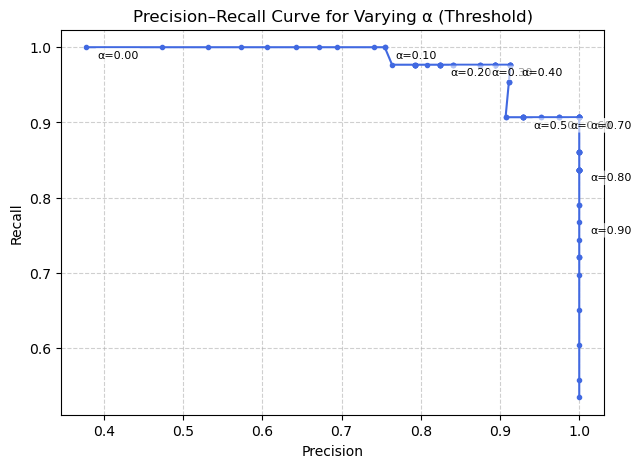

In [49]:
ps = []
rs = []
for i in range(100):
    alpha = i/100.0
    my_y = binary_classify(y_prob, alpha)
    p = precision(y_test, my_y)
    r = recall(y_test, my_y)
    ps += [p]
    rs += [r]


# --- Plot precision vs recall ---
plt.figure(figsize=(7, 5))
plt.plot(ps, rs, marker='o', markersize=3, linestyle='-', color='royalblue')
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision–Recall Curve for Varying α (Threshold)")
plt.grid(True, linestyle='--', alpha=0.6)

# --- Annotate alpha values at selected points ---
for i in range(0, 100, 10):  # Label every 10th alpha value
    alpha = i / 100.0
    # Offset labels slightly for readability
    plt.annotate(f'α={alpha:.2f}', 
                 (ps[i], rs[i]),
                 textcoords="offset points", 
                 xytext=(8, -8), 
                 ha='left', fontsize=8,
                 bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.6, lw=0))

plt.show()

"""
## Step 3: Reflect on what you see

Look carefully at your Precision–Recall plot. Think about how changing α (the classification threshold)
affects your model’s behavior.

### Reflection Questions

1. What general pattern do you notice between **precision** and **recall** as α increases?
   - Why does this happen?

2. Where on the plot do you see the “best balance” between precision and recall?
   - How would you decide what balance is best for a particular application?

3. Suppose your model is being used for **disease detection** or **fraud detection**:
   - Would you prefer higher precision or higher recall? Why?

4. Did α = 0.5 (the default) seem like a good threshold for this dataset?
   - If not, what would you change it to, and why?

5. What happens near the extreme α values (very small or very large)?
   - How does that relate to how often the model predicts “positive”?

Take a moment to discuss or write down your thoughts before moving on.


Now we want to see how weighted F1-scores vary as a function of alpha. 

### 🧠 Reflection and Visualization

Before we try to find the best threshold automatically, let’s *explore* what’s happening.

👉 **Reflection questions**

1. What do you think happens to **precision** as we raise the threshold?
2. What about **recall**?
3. Where do you think the **F1 score** might peak — closer to low thresholds or high ones?

Now, let’s **plot all three metrics** versus the classification threshold to see what’s going on.

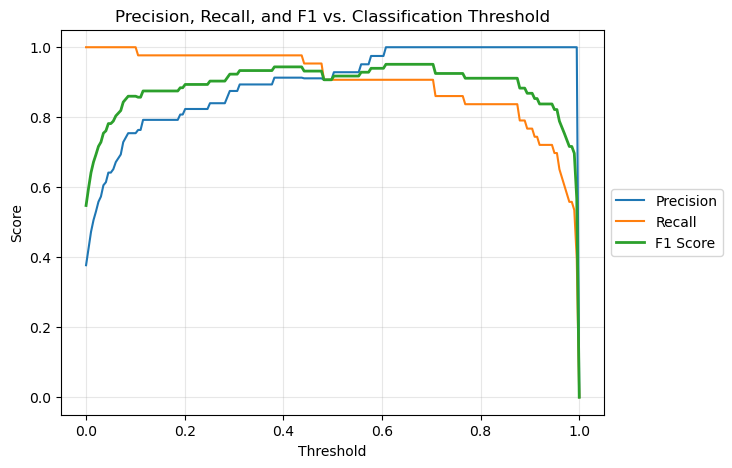

In [77]:
# Thresholds to test
thresholds = np.linspace(0, 1, 200)

# Calculate precision, recall, F1 for each threshold
precisions = []
recalls = []
f1_scores = []

for t in thresholds:
    observed = binary_classify(sorted_y_prob, t)
    precisions.append(precision(sorted_y_test, observed))
    recalls.append(recall(sorted_y_test, observed))
    f1_scores.append(f1(sorted_y_test, observed))

# Plot
plt.figure(figsize=(7, 5))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1_scores, label="F1 Score", linewidth=2)
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 vs. Classification Threshold")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True, alpha=0.3)
plt.show()

## Step 4: Finding the optimal split-point

✅ **Follow-up (next cell)**
In the next step, we’ll use `numpy` to *find the threshold* that gives the **maximum F1 score**.

In [73]:
np.argmax(f1_scores)

np.int64(121)

✅ **The best alpha**
Based on the previous result, determine the best alpha and fill it in below for opt_alpha

In [74]:
opt_alpha = 121/200

observed = binary_classify(y_prob, opt_alpha)
ps = precision(y_test, observed)
rs = recall(y_test, observed)
opt_tp = tp(y_test, observed)
opt_tn = tn(y_test, observed)
opt_fp = fp(y_test, observed)
opt_fn = fn(y_test, observed)

Now draw a nice confusion matrix. 

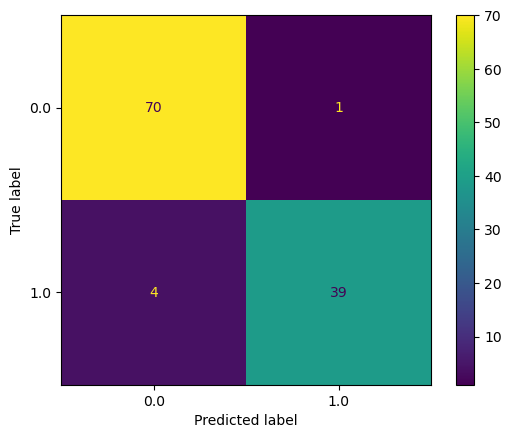

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, observed, labels=lreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lreg.classes_)
disp.plot()
plt.show()